# IMPORT LIBRARIES 


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import pi
import os
import warnings

warnings.filterwarnings("ignore")
plt.style.use("ggplot")
sns.set_palette("viridis")

# let define paths for each

In [9]:
data_path = r"../data/sierraleone-bumbuna.csv"
image_dir = r"../images/sierraleone"
output_clean_path = r"../data/sierraleone_clean.csv"

os.makedirs(image_dir, exist_ok=True)
def show_and_save_plot(filename):
    plt.tight_layout()
    plt.savefig(os.path.join(image_dir, filename), dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")


# LOAD DATA

In [10]:
df = pd.read_csv(data_path)
print("Data loaded successfully")
print("Shape:", df.shape)
df.head()

Data loaded successfully
Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# SUMMARY STATISTICS & MISSING VALUES

In [11]:
print("Summary Statistics")
display(df.describe())

print("Missing Values")
display(df.isna().sum())

missing_cols = df.columns[df.isna().mean() > 0.05]
print("\nColumns with >5% missing values:", list(missing_cols))

Summary Statistics


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Missing Values


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


Columns with >5% missing values: ['Comments']


#  DATA CLEANING & OUTLIER DETECTION

In [12]:
df_clean = df.copy()

for col in df_clean.select_dtypes(include=np.number).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

if 'Timestamp' in df_clean.columns:
    df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')
    df_clean.dropna(subset=['Timestamp'], inplace=True)

# Outlier detection and clipping
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in outlier_cols:
    if col in df_clean.columns:
        z = np.abs(stats.zscore(df_clean[col].dropna()))
        outliers = (z > 3).sum()
        print(f"{col}: {outliers} outliers detected (|Z|>3)")
        df_clean[col] = np.clip(df_clean[col], df_clean[col].quantile(0.01), df_clean[col].quantile(0.99))

GHI: 2477 outliers detected (|Z|>3)
DNI: 7586 outliers detected (|Z|>3)
DHI: 2986 outliers detected (|Z|>3)
ModA: 1604 outliers detected (|Z|>3)
ModB: 2041 outliers detected (|Z|>3)
WS: 3967 outliers detected (|Z|>3)
WSgust: 3665 outliers detected (|Z|>3)


# TIME SERIES ANALYSIS 

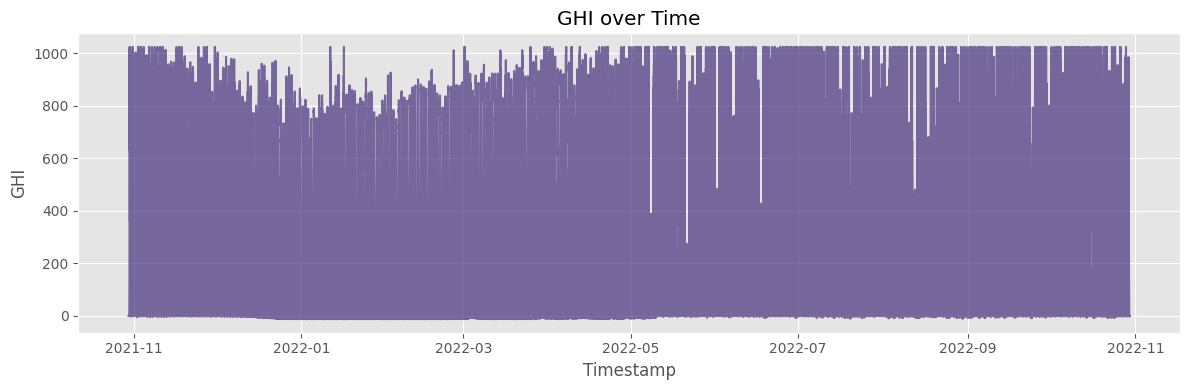

Saved: time_series_GHI.png


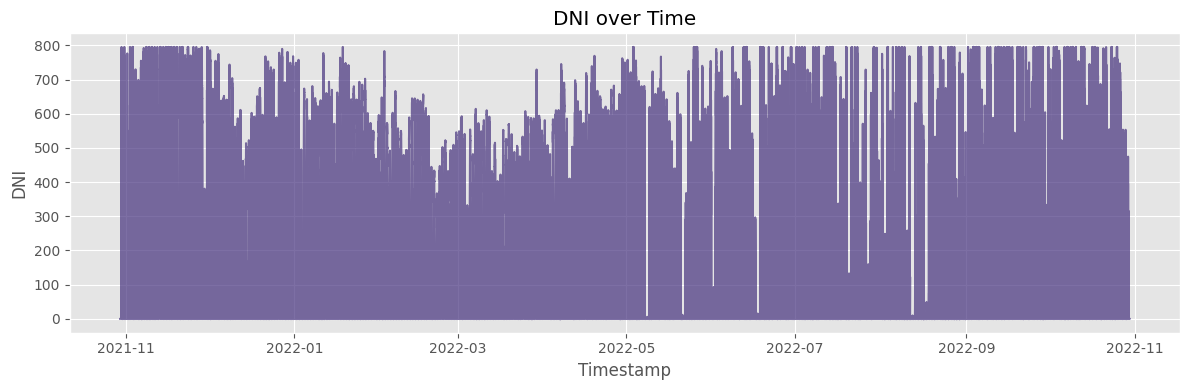

Saved: time_series_DNI.png


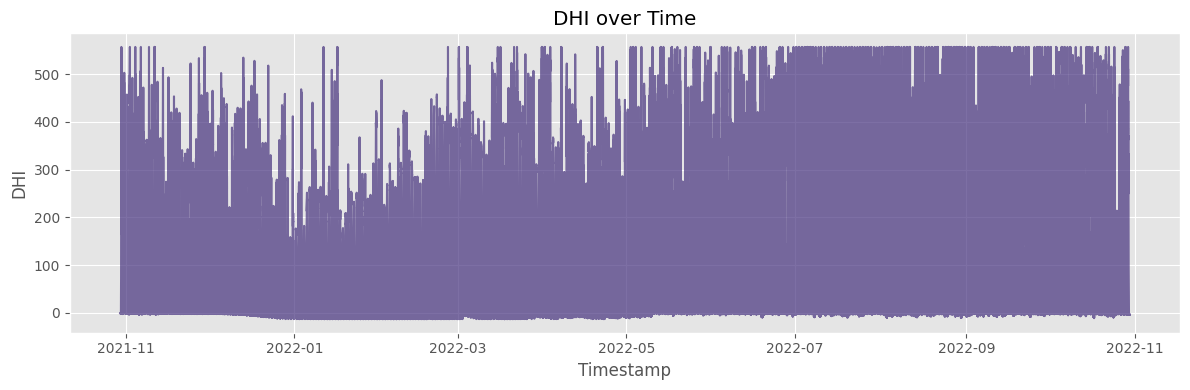

Saved: time_series_DHI.png


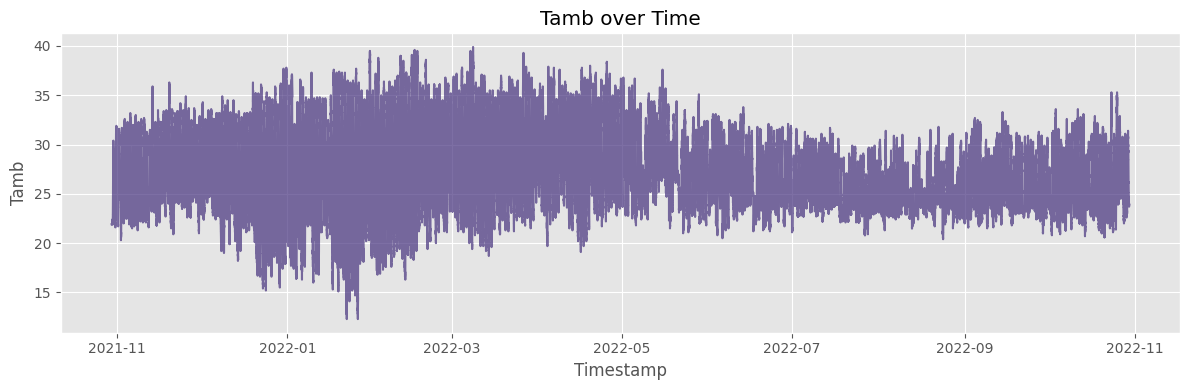

Saved: time_series_Tamb.png


In [13]:
if 'Timestamp' in df_clean.columns:
    time_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
    for col in time_cols:
        if col in df_clean.columns:
            plt.figure(figsize=(12, 4))
            plt.plot(df_clean['Timestamp'], df_clean[col], alpha=0.7)
            plt.title(f"{col} over Time")
            plt.xlabel("Timestamp")
            plt.ylabel(col)
            show_and_save_plot(f"time_series_{col}.png")

# CLEANING IMPACT

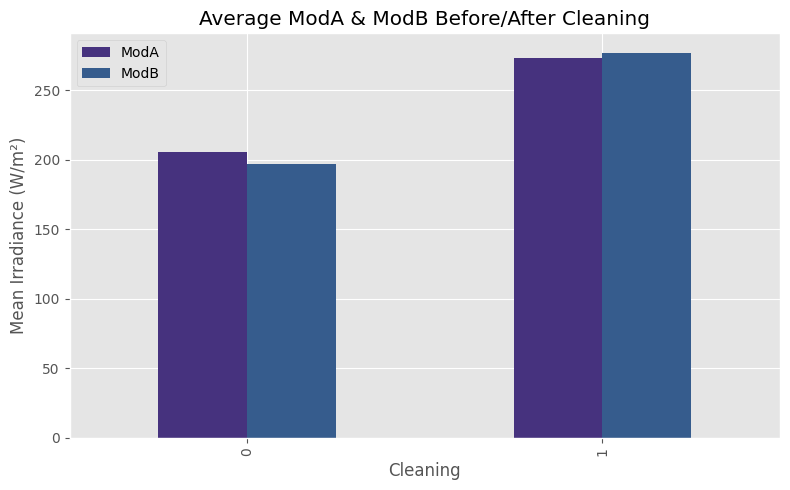

Saved: cleaning_impact.png


In [14]:
if {'Cleaning', 'ModA', 'ModB'}.issubset(df_clean.columns):
    plt.figure(figsize=(8, 5))
    df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', ax=plt.gca())
    plt.title("Average ModA & ModB Before/After Cleaning")
    plt.ylabel("Mean Irradiance (W/m²)")
    show_and_save_plot("cleaning_impact.png")

# CORRELATION & RELATIONSHIP ANALYSIS

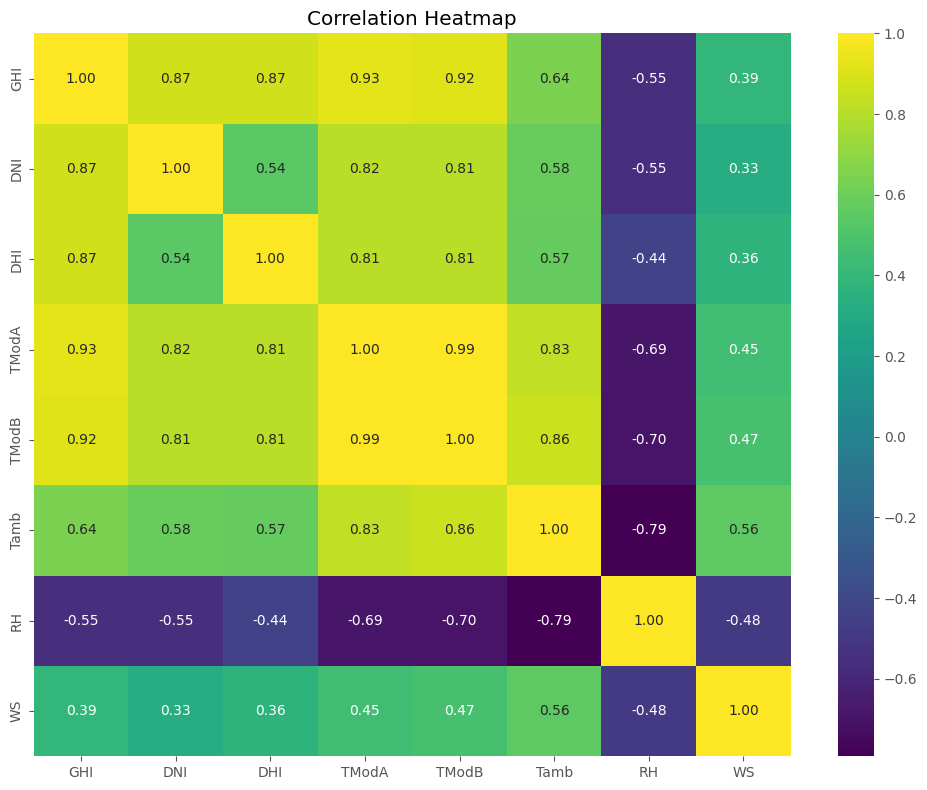

Saved: correlation_heatmap.png


In [15]:
corr_cols = [c for c in ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS'] if c in df_clean.columns]
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
show_and_save_plot("correlation_heatmap.png")

## Scatter plots

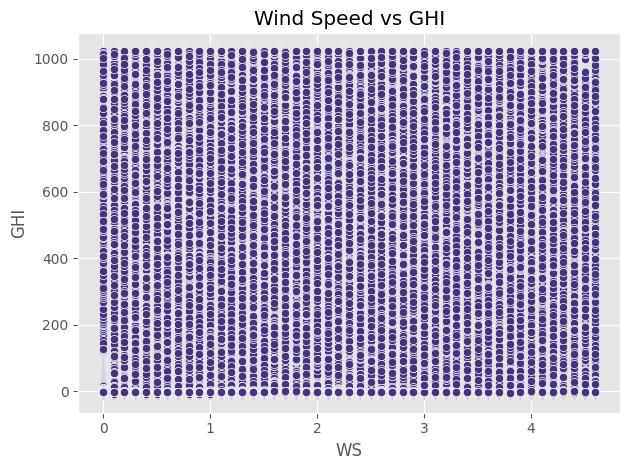

Saved: scatter_WS_vs_GHI.png


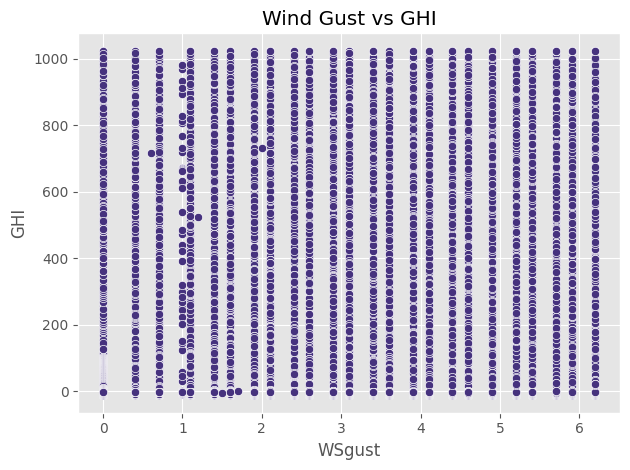

Saved: scatter_WSgust_vs_GHI.png


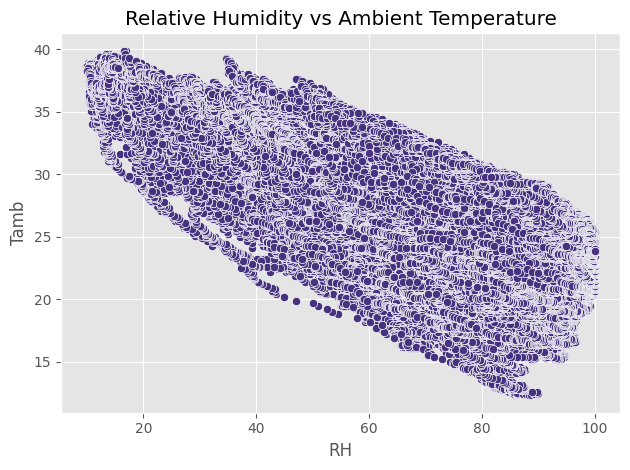

Saved: scatter_RH_vs_Tamb.png


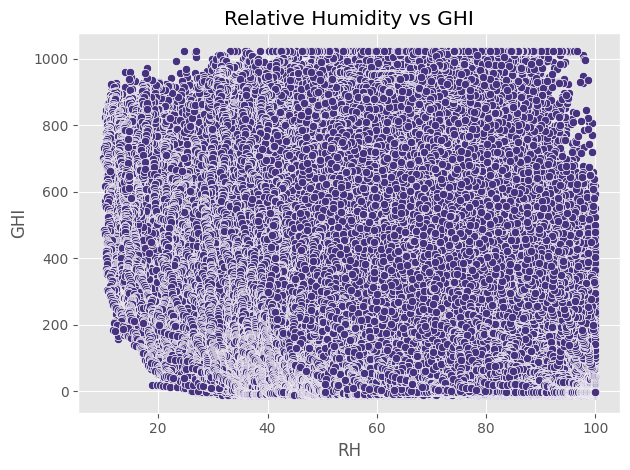

Saved: scatter_RH_vs_GHI.png


In [16]:
if {'WS', 'GHI'}.issubset(df_clean.columns):
    sns.scatterplot(data=df_clean, x='WS', y='GHI')
    plt.title("Wind Speed vs GHI")
    show_and_save_plot("scatter_WS_vs_GHI.png")

if {'WSgust', 'GHI'}.issubset(df_clean.columns):
    sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
    plt.title("Wind Gust vs GHI")
    show_and_save_plot("scatter_WSgust_vs_GHI.png")

if {'RH', 'Tamb'}.issubset(df_clean.columns):
    sns.scatterplot(data=df_clean, x='RH', y='Tamb')
    plt.title("Relative Humidity vs Ambient Temperature")
    show_and_save_plot("scatter_RH_vs_Tamb.png")

if {'RH', 'GHI'}.issubset(df_clean.columns):
    sns.scatterplot(data=df_clean, x='RH', y='GHI')
    plt.title("Relative Humidity vs GHI")
    show_and_save_plot("scatter_RH_vs_GHI.png")

# WIND & DISTRIBUTION ANALYSIS

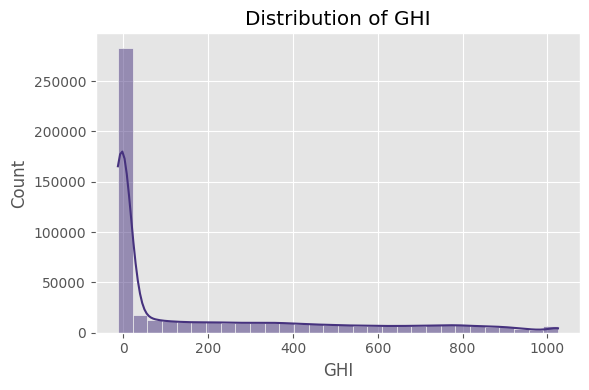

Saved: hist_GHI.png


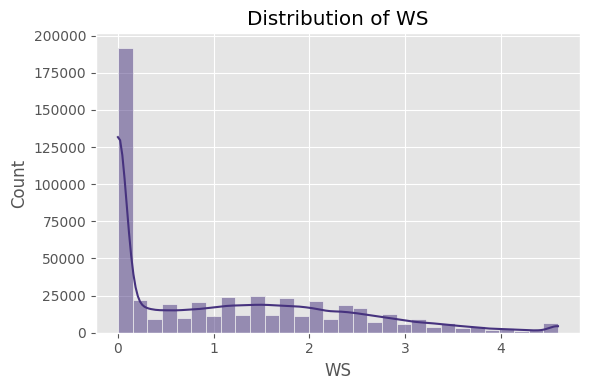

Saved: hist_WS.png


In [17]:
for col in ['GHI', 'WS']:
    if col in df_clean.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df_clean[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        show_and_save_plot(f"hist_{col}.png")

## Wind rose

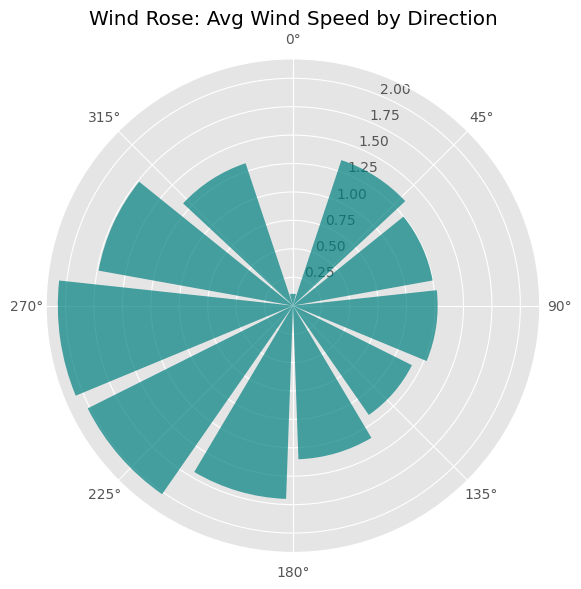

Saved: wind_rose.png


In [18]:
if {'WS', 'WD'}.issubset(df_clean.columns):
    wind = df_clean[['WS', 'WD']].dropna()
    bins = np.arange(0, 360, 30)
    wind['WD_bin'] = pd.cut(wind['WD'], bins=bins, include_lowest=True)
    avg_ws = wind.groupby('WD_bin')['WS'].mean()
    angles = np.linspace(0, 2 * np.pi, len(avg_ws), endpoint=False)
    values = avg_ws.values

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.bar(angles, values, width=0.5, color='teal', alpha=0.7)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    plt.title("Wind Rose: Avg Wind Speed by Direction")
    show_and_save_plot("wind_rose.png")

# TEMPERATURE ANALYSIS

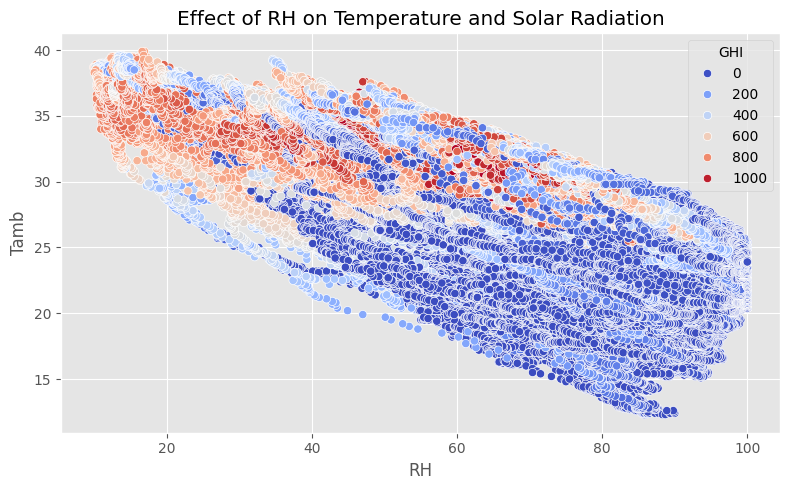

Saved: RH_Tamb_GHI_effect.png


In [19]:
if {'RH', 'Tamb', 'GHI'}.issubset(df_clean.columns):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_clean, x='RH', y='Tamb', hue='GHI', palette='coolwarm')
    plt.title("Effect of RH on Temperature and Solar Radiation")
    show_and_save_plot("RH_Tamb_GHI_effect.png")

# BUBBLE CHART

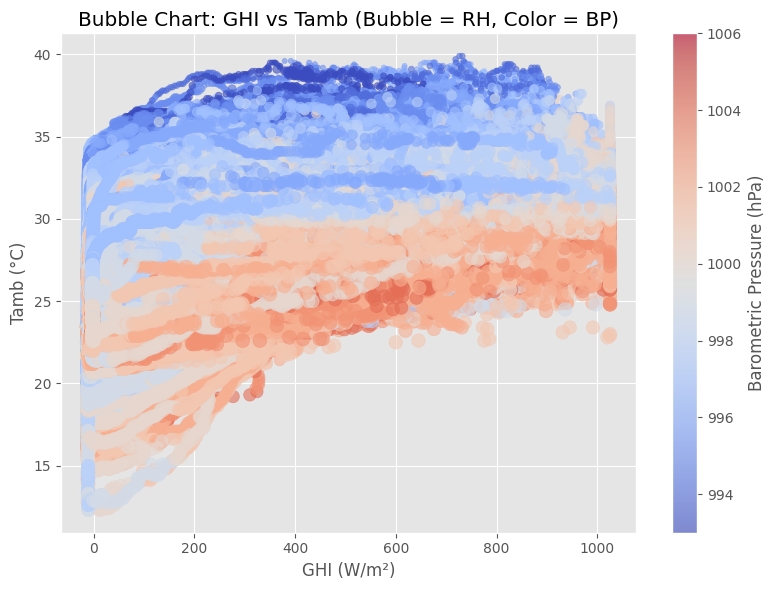

Saved: bubble_GHI_Tamb_RH_BP.png


In [20]:
if {'GHI', 'Tamb', 'RH', 'BP'}.issubset(df_clean.columns):
    plt.figure(figsize=(8, 6))
    plt.scatter(df_clean['GHI'], df_clean['Tamb'],
                s=df_clean['RH'], c=df_clean['BP'], cmap='coolwarm', alpha=0.6)
    plt.title("Bubble Chart: GHI vs Tamb (Bubble = RH, Color = BP)")
    plt.xlabel("GHI (W/m²)")
    plt.ylabel("Tamb (°C)")
    plt.colorbar(label="Barometric Pressure (hPa)")
    show_and_save_plot("bubble_GHI_Tamb_RH_BP.png")

# MONTHLY & HOURLY ANALYSIS

In [21]:
if 'Timestamp' in df_clean.columns:
    # Extract month and hour
    df_clean['Month'] = df_clean['Timestamp'].dt.month_name()
    df_clean['Hour'] = df_clean['Timestamp'].dt.hour

## Monthly averages

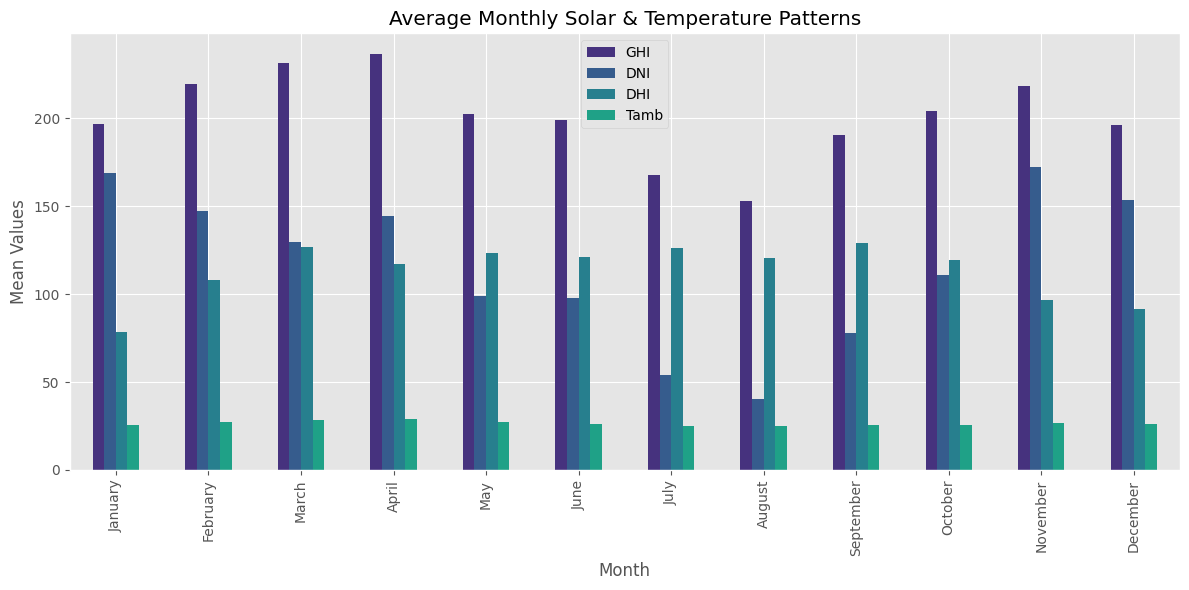

Saved: monthly_trends.png


In [22]:
monthly = df_clean.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reindex(
        ['January','February','March','April','May','June','July','August','September','October','November','December']
    )
monthly.plot(kind='bar', figsize=(12,6))
plt.title("Average Monthly Solar & Temperature Patterns")
plt.ylabel("Mean Values")
show_and_save_plot("monthly_trends.png")


## Hourly averages

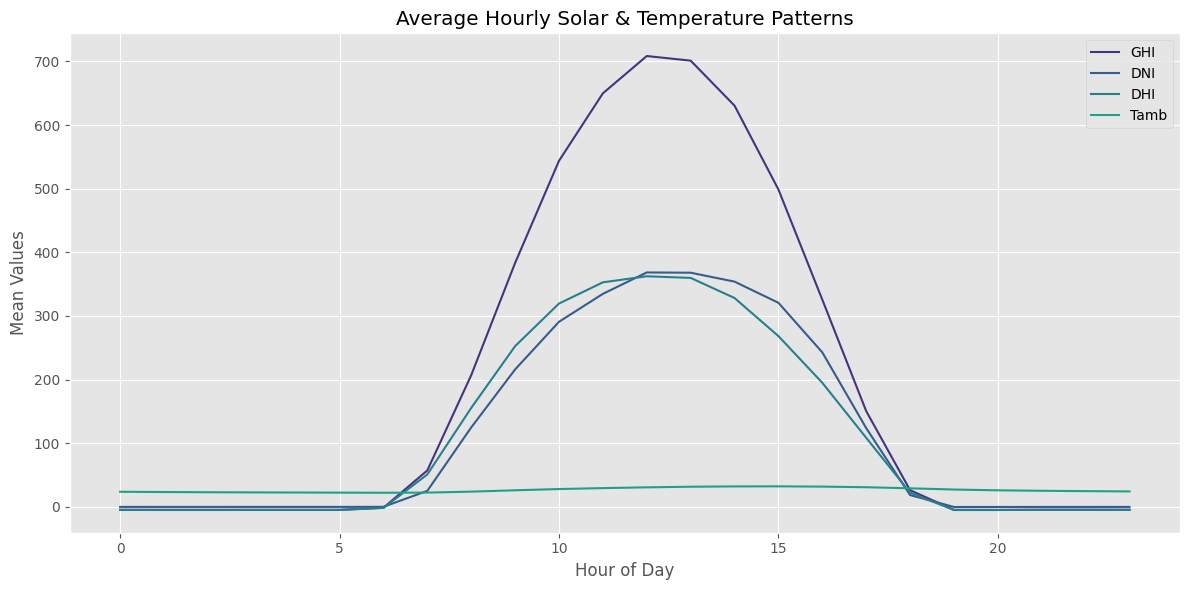

Saved: hourly_trends.png


In [23]:
hourly = df_clean.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
hourly.plot(figsize=(12,6))
plt.title("Average Hourly Solar & Temperature Patterns")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Values")
show_and_save_plot("hourly_trends.png")


# SAVE CLEANED DATA

In [24]:
df_clean.to_csv(output_clean_path, index=False)
print(f"Cleaned data saved to: {output_clean_path}")
print(f"All plots saved to: {image_dir}")

Cleaned data saved to: ../data/sierraleone_clean.csv
All plots saved to: ../images/sierraleone
